# Modeling with CountVectorizer + TFIDF 

The goal of this workbook is to explore a collection of text documents with combination of features extraction techniques in text and feature engineering. 
1. Features extraction: CountVectorizer, and TFIDF
2. Feature engineering: Content only, Content + Description feature
3. Parameters: Using the custom_stop_words_final or not, ngrams: (1,2) and (1,3), TFIDF with min, max. 

Also, nine models are compared for performance metrics including accuracy, recall, and train-test score. We adapted KNN, logistic regression and Naive Bayes as our final candidates for the consideration of computing power, run time, and score metrics. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modeling-with-CountVectorizer-+-TFIDF" data-toc-modified-id="Modeling-with-CountVectorizer-+-TFIDF-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modeling with CountVectorizer + TFIDF</a></span><ul class="toc-item"><li><span><a href="#Exploratory-data-analysis-(EDA)" data-toc-modified-id="Exploratory-data-analysis-(EDA)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory data analysis (EDA)</a></span></li><li><span><a href="#Features-II" data-toc-modified-id="Features-II-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Features II</a></span></li></ul></li><li><span><a href="#Term-Frequency–Inverse-Document-Frequency-(TFIDF)" data-toc-modified-id="Term-Frequency–Inverse-Document-Frequency-(TFIDF)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Term Frequency–Inverse Document Frequency (TFIDF)</a></span></li><li><span><a href="#Models-Testing" data-toc-modified-id="Models-Testing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models Testing</a></span></li><li><span><a href="#Word-Count" data-toc-modified-id="Word-Count-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Word Count</a></span></li><li><span><a href="#Model-Scores" data-toc-modified-id="Model-Scores-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Scores</a></span></li></ul></div>

**All Library**

In [1]:
import pandas as pd
import numpy as np
import regex as re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from afinn import Afinn

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import svm

import time
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/balanced_df_tokenized_lemmatized.csv')
df.shape

(11102, 12)

In [3]:
df['yes_disaster'].unique() #check on the target value only contain 0/1

array([1, 0])

In [4]:
df.shape

(11102, 12)

In [5]:
df.isnull().sum()

author           125
content            1
description        7
publishedAt        5
source             5
source_id       4641
source_name        5
title              5
types             58
url                5
urlToImage       166
yes_disaster       0
dtype: int64

In [6]:
df['description'].fillna('', inplace=True)

In [7]:
df['content'].fillna('', inplace=True)

In [8]:
df.dtypes

author          object
content         object
description     object
publishedAt     object
source          object
source_id       object
source_name     object
title           object
types           object
url             object
urlToImage      object
yes_disaster     int64
dtype: object

Exploratory data analysis (EDA)
---

In [9]:
df.loc[:,'content_description'] = df['content'] + df['description']

In [10]:
# Features I
X = df['content_description']
y = df['yes_disaster']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    random_state=42,
                                                    stratify=y)

In [12]:
y_train.shape[0] == X_train.shape[0]

True

In [13]:
cvec = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = 'english'
                             ) 

In [14]:
X_train_cv = cvec.fit_transform(X_train) # must fit transform to numbers for train 
X_test_cv = cvec.transform(X_test)       # must transform to number for test

In [15]:
#convert the sparse matrix to a typical ndarray using .toarray(). This will return a table
cv_df = pd.DataFrame(X_train_cv.todense(),
                   columns=cvec.get_feature_names())

In [16]:
from project4_function import model_scores

In [17]:
#instantiate models 
import warnings
warnings.filterwarnings('ignore')

lr  = LogisticRegression(random_state=0, solver='lbfgs')
nb  = MultinomialNB()
knn = KNeighborsClassifier()
dt  = DecisionTreeClassifier()
bag = BaggingClassifier(n_estimators=100)
rf  = RandomForestClassifier(random_state = 42)
et  = ExtraTreesClassifier(n_estimators=30, random_state = 42)
ab  = AdaBoostClassifier(n_estimators=100)
gb  = GradientBoostingClassifier(n_estimators=100)
svc = svm.SVC(gamma='scale',
               C=.1,
               kernel='linear',
               random_state=42)


In [18]:
# models = [lr, nb,knn, dt, bag,rf,et,ab,gb,svc]

# score_matrix = pd.DataFrame() 

# for i in models:
#     score_matrix = score_matrix.append(model_scores(i, X_train_cv, y_train, X_test_cv, y_test))
# score_matrix

## Features II

While selecting two features with CountVectorizer, content and description feature has a slightly higher score than content only, about 0.02 in the train-test gap. This could be attributed to the fact that more words are taken into the count vectors columns. Therefore, we could conclude that the feature columns have no significant differences. 

In [19]:
X = df['content']
y = df['yes_disaster']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    random_state=42,
                                                    stratify=y)

In [21]:
cvec = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = 'english'
                             ) 

In [22]:
X_train_cv_2 = cvec.fit_transform(X_train) # must fit transform to numbers for train 
X_test_cv_2 = cvec.transform(X_test)       # must transform to number for test

In [23]:
from project4_function import model_scores

**Content only in the feature columns**

In [24]:
# Content only in the feature columns
lr  = LogisticRegression(random_state=0, solver='lbfgs')
nb  = MultinomialNB()

models = [lr,nb]
score_matrix = pd.DataFrame() 

for i in models:
    score_matrix = score_matrix.append(model_scores(i, X_train_cv_2, y_train, X_test_cv_2, y_test))
score_matrix

,model,accuracy score,recall score,cv train score,cv test score,train score,test score,train-test gap,model status,bias vs variance,fit time
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.743876,0.738473,0.748377,0.740298,0.992674,0.743876,0.248797,overfit,high variance,0.0
0,"MultinomialNB(alpha=1.0, class_prior=None, fit...",0.782421,0.755043,0.790416,0.787117,0.831372,0.782421,0.048951,overfit,high variance,0.0


**Content + Description feature columns**

In [25]:
# Content + Description feature columns
models = [lr,nb]
score_matrix = pd.DataFrame() 
for i in models:
    score_matrix = score_matrix.append(model_scores(i, X_train_cv, y_train, X_test_cv, y_test))
score_matrix

,model,accuracy score,recall score,cv train score,cv test score,train score,test score,train-test gap,model status,bias vs variance,fit time
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.747478,0.745677,0.753302,0.742094,0.993394,0.747478,0.245916,overfit,high variance,0.000000
0,"MultinomialNB(alpha=1.0, class_prior=None, fit...",0.786744,0.765130,0.792217,0.790720,0.833173,0.786744,0.046430,overfit,high variance,0.000001


# Term Frequency–Inverse Document Frequency (TFIDF)

In [26]:
import pickle
custom_stop_words_final = pickle.load( open( "save.p", "rb" ) )

In [27]:
words_not_use = stopwords.words('english')

words_not_use.extend(custom_stop_words_final)

**Using the custom_stop_words_final**

In [28]:
tvec = TfidfVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = words_not_use) 

X_train_tvec_sw = tvec.fit_transform(X_train)
X_test_tvec_sw = tvec.transform(X_test)

**Not using the custom_stop_words_final**

In [29]:
tvec = TfidfVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = 'english')

X_train_tvec_nsw = tvec.fit_transform(X_train)
X_test_tvec_nsw = tvec.transform(X_test)

**Ngram: Include 1-grams and 2-grams.**

In [30]:
tvec = TfidfVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = words_not_use, 
                             ngram_range=(1, 2)) 

X_train_tvec_n = tvec.fit_transform(X_train)
X_test_tvec_n = tvec.transform(X_test)



**Ngram: Include 1-grams and 3-grams**

In [31]:
tvec = TfidfVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = words_not_use, 
                             ngram_range=(1, 3)) 

X_train_tvec_n3 = tvec.fit_transform(X_train)
X_test_tvec_n3 = tvec.transform(X_test)

**TFIDF with min, max**

In [32]:
tfidf = TfidfVectorizer(stop_words=('english'), 
                        min_df=1, 
                        max_df=2)

# Fitting and transforming the data
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

# Models Testing

We try to finalize which models would be a good fit, embedded with a combination of features 

In [33]:
from project4_function import model_scores

lr  = LogisticRegression(random_state=0, solver='lbfgs')
nb  = MultinomialNB()

In [34]:
#Using the custom_stop_words_final
models = [lr,nb]
score_matrix = pd.DataFrame() 

for i in models:
    score_matrix = score_matrix.append(model_scores(i, X_train_tvec_sw, y_train, X_test_tvec_sw, y_test))
score_matrix

,model,accuracy score,recall score,cv train score,cv test score,train score,test score,train-test gap,model status,bias vs variance,fit time
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.795029,0.743516,0.793056,0.789287,0.852991,0.795029,0.057962,overfit,high variance,9.536743e-07
0,"MultinomialNB(alpha=1.0, class_prior=None, fit...",0.785663,0.775937,0.786933,0.776668,0.822844,0.785663,0.037181,overfit,high variance,0.000000e+00


In [35]:
#Not Using the custom_stop_words_final
models = [lr,nb]
score_matrix = pd.DataFrame() 

for i in models:
    score_matrix = score_matrix.append(model_scores(i, X_train_tvec_nsw, y_train, X_test_tvec_nsw, y_test))
score_matrix

,model,accuracy score,recall score,cv train score,cv test score,train score,test score,train-test gap,model status,bias vs variance,fit time
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.798631,0.746398,0.797143,0.790723,0.852390,0.798631,0.053759,overfit,high variance,0.000001
0,"MultinomialNB(alpha=1.0, class_prior=None, fit...",0.785663,0.785303,0.788133,0.774867,0.823925,0.785663,0.038262,overfit,high variance,0.000000


In [36]:
# Ngram: gram_range=(1, 2)
models = [lr,nb]
score_matrix = pd.DataFrame() 

for i in models:
    score_matrix = score_matrix.append(model_scores(i, X_train_tvec_n, y_train, X_test_tvec_n, y_test))
score_matrix

,model,accuracy score,recall score,cv train score,cv test score,train score,test score,train-test gap,model status,bias vs variance,fit time
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.796110,0.756484,0.791135,0.788570,0.870766,0.796110,0.074657,overfit,high variance,0.0
0,"MultinomialNB(alpha=1.0, class_prior=None, fit...",0.785303,0.788184,0.789695,0.783152,0.875811,0.785303,0.090508,overfit,high variance,0.0


In [37]:
# Ngram: gram_range=(1, 3)
models = [lr,nb]
score_matrix = pd.DataFrame() 

for i in models:
    score_matrix = score_matrix.append(model_scores(i, X_train_tvec_n3, y_train, X_test_tvec_n3, y_test))
score_matrix

,model,accuracy score,recall score,cv train score,cv test score,train score,test score,train-test gap,model status,bias vs variance,fit time
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.790346,0.760807,0.790294,0.792166,0.880495,0.790346,0.090149,overfit,high variance,0.0
0,"MultinomialNB(alpha=1.0, class_prior=None, fit...",0.787104,0.781700,0.790655,0.789277,0.910401,0.787104,0.123297,overfit,high variance,0.0


In [38]:
#TFIDF with min, max
models = [lr,nb]
score_matrix = pd.DataFrame() 

for i in models:
    score_matrix = score_matrix.append(model_scores(i, X_train_tf, y_train, X_test_tf, y_test))
score_matrix

,model,accuracy score,recall score,cv train score,cv test score,train score,test score,train-test gap,model status,bias vs variance,fit time
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.670029,0.742795,0.588762,0.586817,0.955080,0.670029,0.285052,overfit,high variance,0.0
0,"MultinomialNB(alpha=1.0, class_prior=None, fit...",0.594741,0.484150,0.517176,0.543946,0.893466,0.594741,0.298726,overfit,high variance,0.0


# Word Count

We found out that disaster news reports has more words than non-disaster news

In [39]:
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

In [40]:
disaster_mean = df[df.yes_disaster==1]['word_count'].mean()
nondisaster_mean = df[df.yes_disaster==0]['word_count'].mean()
print ('disaster_mean: ', disaster_mean)
print('nondisaster_mean: ' ,nondisaster_mean)

disaster_mean:  576.3968654296523
nondisaster_mean:  682.4121779859485


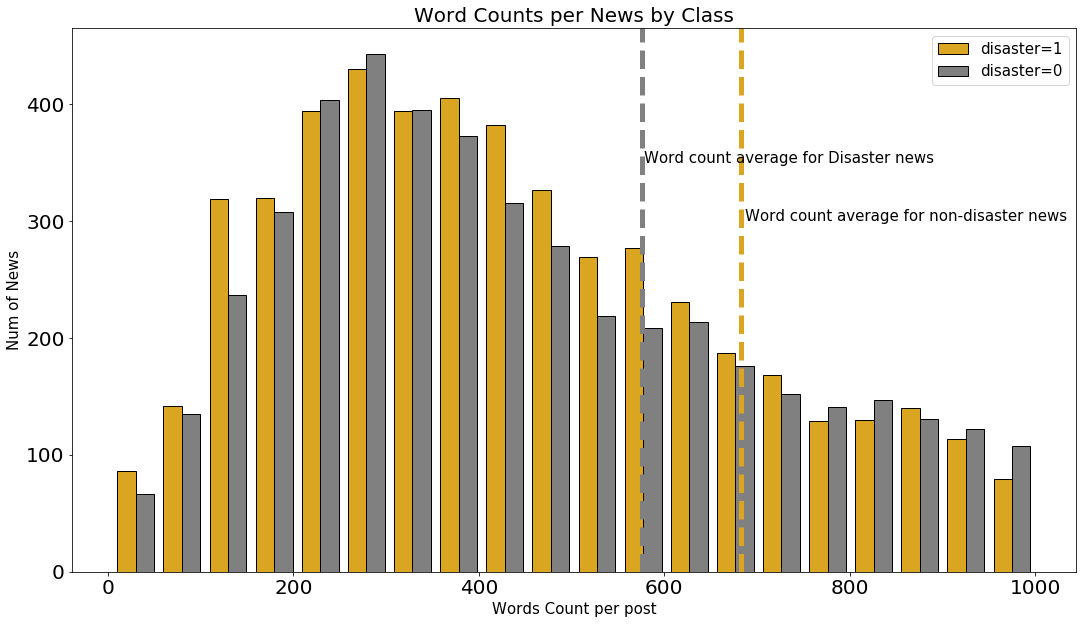

In [41]:
plt.figure(figsize=(18,10))

plt.hist([df[df['yes_disaster']==1]['word_count'], 
          df[df['yes_disaster']==0]['word_count']],
         
         bins=20, color=['goldenrod', 'grey'], range=[5, 1000], ec='k')

plt.xlabel ('Words Count per post', fontsize=15)
plt.ylabel ('Num of News', fontsize=15)

plt.legend(['disaster=1', 'disaster=0'], fontsize=15)

disaster_mean = df[df.yes_disaster==1]['word_count'].mean()
nondisaster_mean = df[df.yes_disaster==0]['word_count'].mean()

plt.axvline(x = disaster_mean,
            color ='grey',linestyle='--', linewidth=5, 
            label ='disaster_mean')

plt.axvline(x = nondisaster_mean, 
            color = 'goldenrod', linestyle='--', 
            label = 'nondisaster_mean',
            linewidth=5)

plt.text(disaster_mean+2, 350, 'Word count average for Disaster news', fontsize=15)
plt.text(nondisaster_mean+5, 300, 'Word count average for non-disaster news', fontsize=15, )

plt.title('Word Counts per News by Class', fontsize=20)
plt.tick_params(labelsize=20); 

# Model Scores

Below models are ran with Count Vectorizer as a preliminary evaluation on performance

In [42]:
results_table = pd.read_csv('../data/model_scores.csv')
results_table

,model,model_abr,accuracy score,recall score,cv train score,cv test score,train score,test score,train-test gap,model status,bias vs variance,fit time
0,LogisticRegression,LR,0.747478,0.745677,0.753302,0.742094,0.993394,0.747478,0.245916,overfit,high variance,0.000000e+00
1,MultinomialNB,NB,0.786744,0.765130,0.792217,0.790720,0.833173,0.786744,0.046430,overfit,high variance,0.000000e+00
2,KNeighborsClassifier,KNN,0.721437,0.738250,0.708981,0.710755,0.749427,0.721437,0.027990,overfit,high variance,9.540000e-07
3,DecisionTreeClassifier,DT,0.719335,0.700802,0.706688,0.692389,0.929490,0.719335,0.210155,overfit,high variance,0.000000e+00
4,RandomForestClassifier,RF,0.747421,0.724876,0.733312,0.729837,0.920191,0.747421,0.172770,overfit,high variance,0.000000e+00
5,ExtraTreeClassifier,ET,0.748567,0.694689,0.737643,0.745891,0.929490,0.748567,0.180923,overfit,high variance,0.000000e+00
6,AdaBoostClassifier,AB,0.774551,0.764234,0.758854,0.747985,0.775541,0.774551,0.000990,overfit,high variance,0.000000e+00
7,GradientBoostingClassifier,GB,0.785632,0.772258,0.774459,0.776078,0.794459,0.785632,0.008826,overfit,high variance,0.000000e+00
8,SVC,SVC,0.724685,0.752006,0.711083,0.704240,0.924777,0.724685,0.200092,overfit,high variance,7.150000e-07


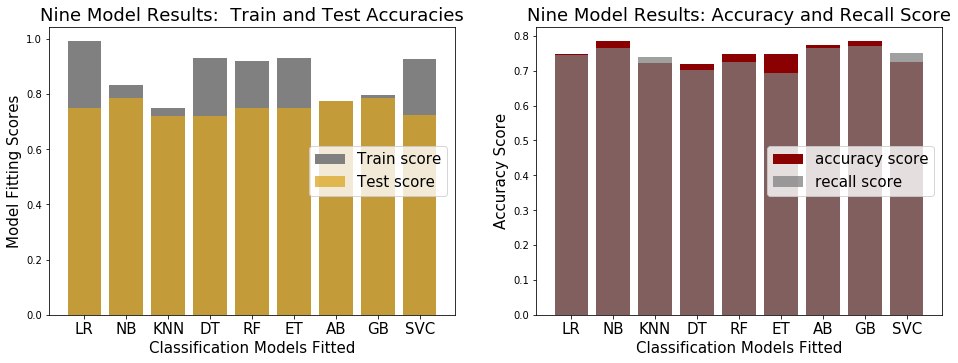

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
ax      = ax.ravel()
plt.subplots_adjust(bottom=0.00, top=1.00)

ax[0].bar(results_table.model_abr, results_table['train score'], color='grey', alpha=1.00)
ax[0].bar(results_table.model_abr, results_table['test score'], color='goldenrod', alpha=.75)

ax[0].set_title('Nine Model Results:  Train and Test Accuracies', fontsize=18)
ax[0].set_xlabel('Classification Models Fitted', fontsize=15)
ax[0].set_ylabel('Model Fitting Scores', fontsize=15)
ax[0].set_xticklabels(labels=results_table.model_abr, fontsize=15)
ax[0].legend(['Train score', 'Test score'], loc=7, fontsize=15)


ax[1].bar(results_table.model_abr, results_table['accuracy score'], color='darkred', alpha=1.00)
ax[1].bar(results_table.model_abr, results_table['recall score'], color='grey', alpha=.75)


ax[1].set_title('Nine Model Results: Accuracy and Recall Score', fontsize=18)
ax[1].set_xlabel('Classification Models Fitted', fontsize=15)
ax[1].set_ylabel('Accuracy Score', fontsize=15)
ax[1].set_xticklabels(labels=results_table.model_abr, fontsize=15)
ax[1].legend(['accuracy score', 'recall score'], loc=7, fontsize=15)


print()
plt.show();